In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, sys
import tensorflow as tf

from tcn import TCN, tcn_full_summary
print(tf.__version__)

from utils.data_utils import SAMPLING_FREQUENCY
from custom.models import build_model

2.8.1


In [5]:
model = build_model()
model.summary()

Model: "tcn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, None, 12)]        0         
                                                                 
 tcn (TCN)                   (None, None, 32)          43744     
                                                                 
 outputs (Dense)             (None, None, 1)           33        
                                                                 
Total params: 43,777
Trainable params: 42,881
Non-trainable params: 896
_________________________________________________________________


## Prerequisites

Specify the directory where the data is stored.

In [6]:
ROOT_DIR = '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata' if sys.platform == 'linux' else 'Z:\\MobiliseD_TVS\\rawdata'

Get a list of subject ids and the corresponding data filenames.

In [7]:
sub_ids = [sub_id for sub_id in os.listdir(ROOT_DIR) if sub_id.startswith('sub-')]
filenames_list = [[os.path.join(ROOT_DIR, sub_id, filename) for filename in os.listdir(os.path.join(ROOT_DIR, sub_id)) if sub_id.startswith('sub-')][0] for sub_id in sub_ids]
print(filenames_list)

['/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4002/sub-4002.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4003/sub-4003.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4005/sub-4005.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4006/sub-4006.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4007/sub-4007.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4008/sub-4008.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4009/sub-4009.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4011/sub-4011.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4012/sub-4012.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4013/sub-4013.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4015/sub-4015.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4016/sub-4016.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/sub-4017/sub-4017.npy', '/mnt/neurogeriatrics_data/MobiliseD_TVS/rawdata/s

In [16]:
SEQUENCE_LENGTH = int(10*SAMPLING_FREQUENCY)
for idx_file in range(len(filenames_list)):
    
    # Load data from .npy file
    with open(filenames_list[idx_file], 'rb') as infile:
        data = np.load(infile)
        
    # Split features and labe;s
    labels = data[:,-2].reshape(-1, 1)     # one-but-last column corresponds to CWP
    features = data[:,:-2]  # consider sensor recordings as features
    
    if idx_file > 0:   
        # Create dataset from timeseries array
        features_ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            features,
            None,
            sequence_length=SEQUENCE_LENGTH,
            sequence_stride=SEQUENCE_LENGTH
        )
        labels_ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            labels,
            None,
            sequence_length=SEQUENCE_LENGTH,
            sequence_stride=SEQUENCE_LENGTH
        )
        
        # Concatenate with existing datasets
        ds_features = ds_features.concatenate(features_ds)
        ds_labels = ds_labels.concatenate(labels_ds)
    else:
        # Create dataset from timeseries array
        ds_features = tf.keras.preprocessing.timeseries_dataset_from_array(
            features,
            None,
            sequence_length=SEQUENCE_LENGTH,
            sequence_stride=SEQUENCE_LENGTH
        )
        ds_labels = tf.keras.preprocessing.timeseries_dataset_from_array(
            labels,
            None,
            sequence_length=SEQUENCE_LENGTH,
            sequence_stride=SEQUENCE_LENGTH
        )

In [17]:
print(ds_features.element_spec)
print(ds_labels.element_spec)

TensorSpec(shape=(None, None, 12), dtype=tf.float64, name=None)
TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None)


In [26]:
idx = 0
for batch in zip(ds_features, ds_labels):
    inputs, targets = batch
    print(f"{idx:>4d} | {inputs.shape}")
    idx += 1

   0 | (128, 640, 12)
   1 | (128, 640, 12)
   2 | (19, 640, 12)
   3 | (128, 640, 12)
   4 | (128, 640, 12)
   5 | (128, 640, 12)
   6 | (103, 640, 12)
   7 | (128, 640, 12)
   8 | (128, 640, 12)
   9 | (128, 640, 12)
  10 | (128, 640, 12)
  11 | (128, 640, 12)
  12 | (128, 640, 12)
  13 | (128, 640, 12)
  14 | (30, 640, 12)
  15 | (128, 640, 12)
  16 | (128, 640, 12)
  17 | (128, 640, 12)
  18 | (128, 640, 12)
  19 | (128, 640, 12)
  20 | (41, 640, 12)
  21 | (128, 640, 12)
  22 | (128, 640, 12)
  23 | (128, 640, 12)
  24 | (80, 640, 12)
  25 | (128, 640, 12)
  26 | (128, 640, 12)
  27 | (128, 640, 12)
  28 | (45, 640, 12)
  29 | (128, 640, 12)
  30 | (128, 640, 12)
  31 | (128, 640, 12)
  32 | (108, 640, 12)
  33 | (128, 640, 12)
  34 | (128, 640, 12)
  35 | (128, 640, 12)
  36 | (128, 640, 12)
  37 | (128, 640, 12)
  38 | (128, 640, 12)
  39 | (62, 640, 12)
  40 | (128, 640, 12)
  41 | (128, 640, 12)
  42 | (128, 640, 12)
  43 | (128, 640, 12)
  44 | (10, 640, 12)
  45 | (128, 640,

In [27]:
nb_steps = int(len(ds_features)//128)
nb_steps

1

In [52]:
num_batches = 0
for elem in ds_features:
    num_batches += elem.shape[0]
print(num_batches)

19250


In [53]:
history = model.fit(
    zip(ds_features, ds_labels),
    steps_per_epoch=num_batches,
    epochs=3
)

Epoch 1/3
19250/19250 [==============================] - 6s 327us/step - loss: 0.1164 - acc: 0.9690


In [32]:
predictions = model.predict(ds_features)

In [45]:
X = [x for x in ds_features]

In [47]:
X[0][0].shape

TensorShape([640, 12])

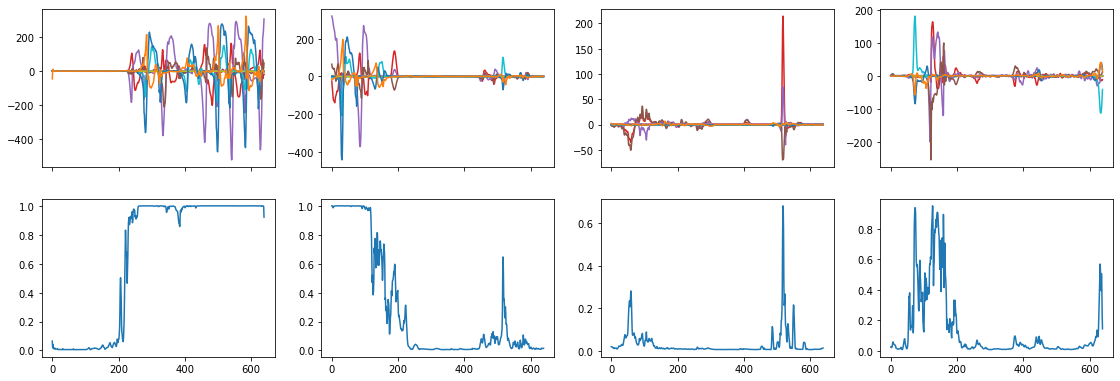

In [48]:
fig, axs = plt.subplots(2, 4, figsize=(19.2, 6.4), sharex=True)
axs[0][0].plot(X[0][0])
axs[0][1].plot(X[0][1])
axs[0][2].plot(X[0][2])
axs[0][3].plot(X[0][3])
axs[1][0].plot(predictions[0])
axs[1][1].plot(predictions[1])
axs[1][2].plot(predictions[2])
axs[1][3].plot(predictions[3])
plt.show()